# Heart Disease

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data

In [2]:
data=pd.read_csv("heartdisease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
data.dropna(axis=0,inplace=True)
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [5]:
print(data.columns.values)

['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'TenYearCHD']


In [6]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


I dont think 'education' is important

<AxesSubplot:>

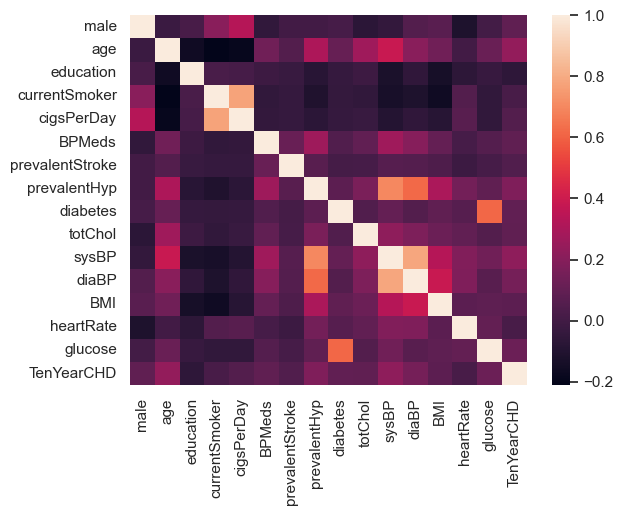

In [7]:
sns.heatmap(data.corr())

I dont think any variable is correlating with others

## Split the data

In [8]:
y=data["TenYearCHD"]
x=data.drop(["TenYearCHD"],axis=1)

### Scale the data

In [9]:
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled

array([[ 1.11982472, -1.23335117,  1.97575158, ...,  0.29168785,
         0.35633992, -0.20312694],
       [-0.8929969 , -0.41559058,  0.01979497, ...,  0.7246142 ,
         1.60828949, -0.24495595],
       [ 1.11982472, -0.1819447 , -0.95818334, ..., -0.10926099,
        -0.06097661, -0.49592996],
       ...,
       [ 1.11982472,  0.05170118, -0.95818334, ...,  0.04570696,
        -0.81214636,  0.17333408],
       [ 1.11982472,  0.16852412,  0.99777327, ..., -1.49413337,
        -0.89560966, -0.57958797],
       [-0.8929969 ,  0.28534706,  0.01979497, ..., -1.06120701,
         0.35633992,  1.05174313]])

## Train test split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

## Regression

In [11]:
reg=LogisticRegression()
reg.fit(x_train,y_train)
reg.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
y_pred=reg.predict(x_train)

## Accuracy of train dataset

In [13]:
cm=confusion_matrix(y_train,y_pred)
cm

array([[2471,   18],
       [ 395,   40]], dtype=int64)

In [14]:
accuracy=(cm[0,0]+cm[1,1])/(sum(cm)[0]+sum(cm)[1])*100
accuracy

85.87551299589603

Our model is 85.87% accurate for train data set

## Testing

In [15]:
y_pred_test=reg.predict(x_test)

In [16]:
cm=confusion_matrix(y_test,y_pred_test)
cm

array([[602,   8],
       [112,  10]], dtype=int64)

In [19]:
accuracy=(cm[0,0]+cm[1,1])/(sum(cm)[0]+sum(cm)[1])*100
accuracy

hello


Our model is 83.6% accurate in Test dataset which is actually good